### NLP Hands-on: Twitter(rebranded as X) US Airlines Sentiment Prediction

`Sample Data Screenshot`

In [83]:
import os
os.getcwd()

'c:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\05. AI and DL IITR-15Mar2025(M)'

### OBJECTIVE: To predict category for the `sentiment of tweets` into three categories: `positive`, `negative', and 'neutral`

In [84]:
# !pip install contractions

In [85]:
# pip install bs4

In [86]:
# pip install numpy

In [87]:
# pip install pandas

In [88]:
# pip install  nltk matplotlib seaborn 

In [89]:
import re, string, unicodedata # import Regex, String and unicodedata
import contractions            # Import contractions library
from bs4 import BeautifulSoup  # Import BeautifulSoup


import numpy as np
import pandas as pd
import nltk                   ## Import Natural Language Tool-kit


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [155]:
### Load the Twittter dataset
data = pd.read_csv("Tweets.csv")

In [91]:
### Show me the sample 10 rows of the dataset
data.sample(10).T

,9031,9404,2399,4283,8264,10251,7974,9415,12822,3820
tweet_id,570276806512779264,569948356933332992,569228707203837952,567734618095230976,568547201208565760,569456923663151104,568914888728449025,569944996616351746,570007852724699136,568100858954522625
airline_sentiment,neutral,negative,negative,negative,positive,negative,negative,negative,negative,negative
airline_sentiment_confidence,1.0,0.6788,0.6729,1.0,1.0,0.6559,0.6703,1.0,1.0,1.0
negativereason,NaN,Cancelled Flight,Bad Flight,Can't Tell,NaN,Flight Booking Problems,Late Flight,Customer Service Issue,Can't Tell,Can't Tell
negativereason_confidence,NaN,0.6788,0.6729,1.0,NaN,0.3441,0.6703,1.0,0.6942,0.6902
airline,US Airways,US Airways,United,United,Delta,US Airways,Delta,US Airways,American,United
airline_sentiment_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,dagzapatero,marvinatorsb,jaycalavas,BhutanOrient,SaraNettesheim,mattirottstock,barrystanbridge,Jess_Yoga,vickyyp__,harris
negativereason_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0,0,0,0,0,0,0,0,0,0


In [92]:
### Let us do some amazing EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [93]:
### Identify the missing columns
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#### `There are no missing records for the columns of our model importance` - `text`(input) and `airline_sentiment`(target)

C:\Users\think\AppData\Local\Temp\ipykernel_37264\530396585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline', data=data, palette='Set2')


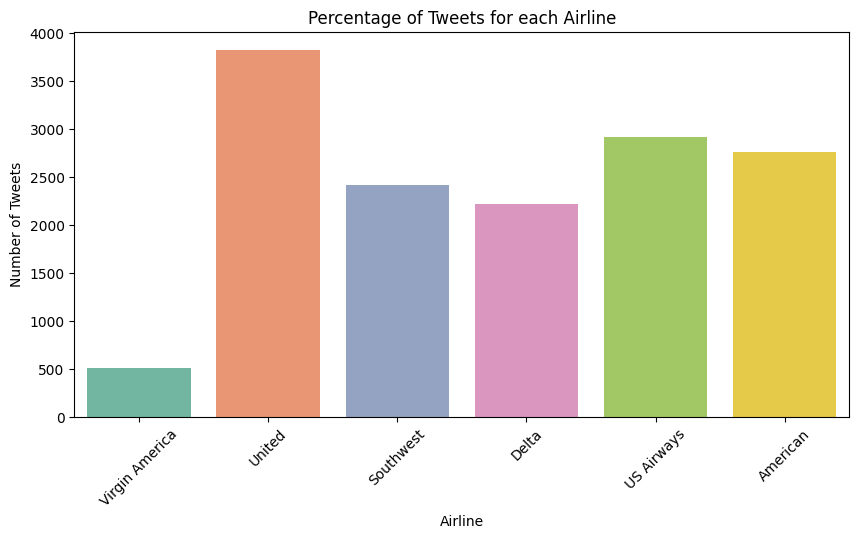

In [94]:
### Let us plot the percentage of tweets `for each airline`
plt.subplots(figsize=(10, 5))
sns.countplot(x='airline', data=data, palette='Set2')
plt.title('Percentage of Tweets for each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

C:\Users\think\AppData\Local\Temp\ipykernel_37264\2803776000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=data, palette='Set2')


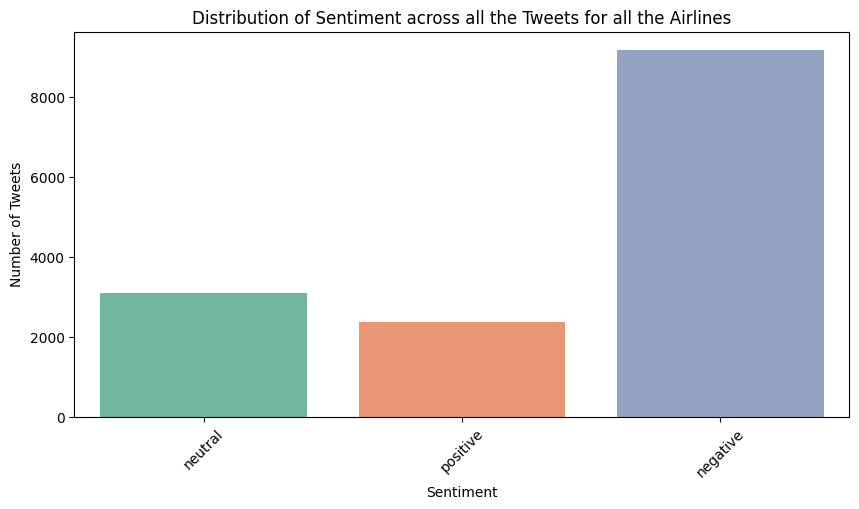

In [95]:
### Distribution of Sentiment across all the tweets for all the airlines
plt.subplots(figsize=(10, 5))
sns.countplot(x='airline_sentiment', data=data, palette='Set2')
plt.title('Distribution of Sentiment across all the Tweets for all the Airlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()  

C:\Users\think\AppData\Local\Temp\ipykernel_37264\3806542011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


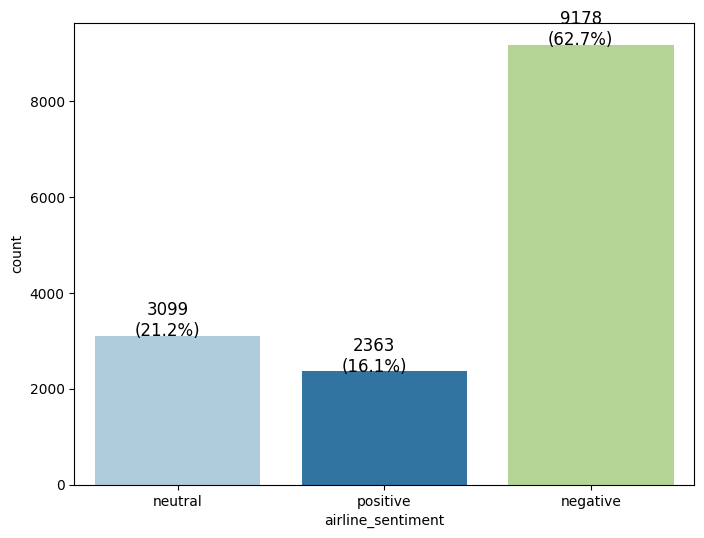

In [96]:


# Assuming 'data' is your DataFrame and 'airline_sentiment' is your column of interest
plt.subplots(figsize=(8, 6))

# Plot the countplot
ax = sns.countplot(
    data=data,
    x='airline_sentiment',
    palette='Paired'
)

# Calculate total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = int(p.get_height())  # Get the height of each bar (count)
    percentage = f'{100 * count / total:.1f}%'  # Calculate the percentage
    x = p.get_x() + p.get_width() / 2 - 0.05  # Adjust x position for better alignment
    y = p.get_height() + 0.5  # Adjust y position to place above the bar
    ax.annotate(f'{count}\n({percentage})', (x, y), size=12, ha='center')  # Annotate the plot

plt.show()


- **Majority of the tweets are negative `(63%)`, followed by neutral tweets (21%), and then the positive tweets (16%)**

- Its common for people to get on `Twitter (now X)` and rant about bad **customer service**

In [97]:
### Show me sample 1--15 tweets in readale format using dataframe - data and column text
data['text'].sample(15).to_list()


['@AmericanAir no hold times, just disconnections.   There is no excuse for that',
 '@SouthwestAir got it squared away. Thank you. I had a man on the inside help me out!',
 '@USAirways  last 2 times I checked a bags they were severally damaged.   No one answers the baggage call line for status?  #chairmanlove',
 '@united ... I want my bag off flight 1142, what do I do now?',
 '@AmericanAir I was happy to purchase the upgrade. If only it was avail on my next flight.',
 '@SouthwestAir THANK YOU SO MUCH!! http://t.co/tGSB1DfPS3',
 "@USAirways that's incorrect. Four people, last flight of the night, with our bags. #horriblecustomerservice",
 '@AmericanAir the fact that that rule makes it poor customer service. I can Cancelled Flight/change on @SouthwestAir with no penalty or hoops.',
 '@JetBlue if someone had bothered to inform us that the airport closed, that would have helped.',
 '@USAirways I agree but per the captain this issue happened before boarding &amp; we all sat in the plane for

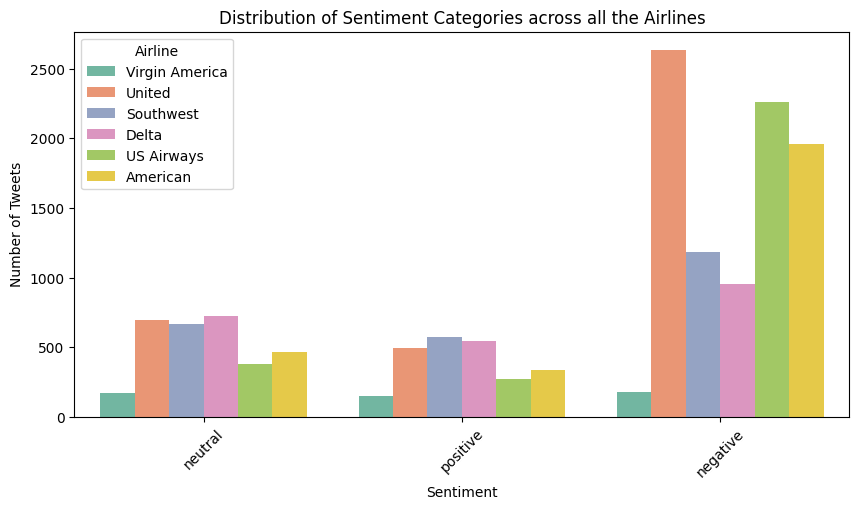

In [98]:
### Distribution of Sentiment categories across all the airlines
plt.subplots(figsize=(10, 5))
sns.countplot(x='airline_sentiment', hue='airline', data=data, palette='Set2')
plt.title('Distribution of Sentiment Categories across all the Airlines')  
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets') 
plt.xticks(rotation=45)
plt.legend(title='Airline')
plt.show()

- **Majority of the negative tweets(63%) are coming for `United` & `US Airways`**

- `Virgin America` airline is probably the only airline where the ratio of **three sentiment categories is somewhat similar** however they are the smallest airline company

- `Delta` & `Southwest` airlines have relatively **less negative tweets** in proportion compared to others

### Task: Plot the different negative reasons for the each airline


In [99]:
data['negativereason'].value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

### Word cloud for each of the class of `Sentiment Category`

- A word cloud is a `visual` representation of text data where each word indicates its frequency or importance within a given text or set of texts

 - Higher the frequency of the word --> bigger the font size of the word in the cloud

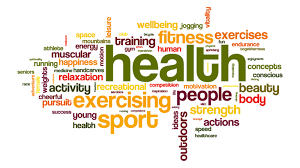

In [100]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
from wordcloud import WordCloud, STOPWORDS

In [102]:
neg_df = data[data['airline_sentiment']=='negative'] # filtering out only the negative sentiment tweets

In [103]:
neg_df.sample(5).T

,5071,9376,7567,13586,1368
tweet_id,569372947720179714,569964389660540928,569528694613671936,569818121302896640,569758414810849280
airline_sentiment,negative,negative,negative,negative,negative
airline_sentiment_confidence,1.0,1.0,1.0,1.0,1.0
negativereason,Cancelled Flight,Customer Service Issue,Late Flight,Customer Service Issue,Flight Booking Problems
negativereason_confidence,1.0,0.6575,0.6507,1.0,0.3505
airline,Southwest,US Airways,Delta,American,United
airline_sentiment_gold,NaN,NaN,NaN,NaN,NaN
name,WesHartman01,TheVoiceofBrian,davisesq212,BiancaFernet,huskerjon00
negativereason_gold,NaN,NaN,NaN,NaN,NaN
retweet_count,0,0,0,0,1


In [104]:
neg_df.shape

(9178, 15)

In [105]:
words = ' '.join(neg_df['text']) #combines all the tweets of the airline passengers into a single string, where each tweet is separated by space

In [106]:
words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

### Cleaning the combined string

In [107]:
sample_words = " RT @Indigo Check out this link which talks about your so called policies and request you to follow them too"

In [108]:
split_words = sample_words.split()

In [109]:
split_words

['RT',
 '@Indigo',
 'Check',
 'out',
 'this',
 'link',
 'which',
 'talks',
 'about',
 'your',
 'so',
 'called',
 'policies',
 'and',
 'request',
 'you',
 'to',
 'follow',
 'them',
 'too']

In [110]:
cleaned_text = " ".join([word for word in words.split() #split the text into words
                         if 'http' not in word #filter out any word that contains http
                         and not word.startswith('@') #or start with @ and
                         and word !='RT' #retweets
                         ])

In [111]:
cleaned_text

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [112]:
wordcloud = WordCloud(stopwords=STOPWORDS, #exclude all the common stopwords
                      background_color='black',
                      width=3000,
                      height=2500,
                      colormap='rainbow' 
                      ).generate(cleaned_text)

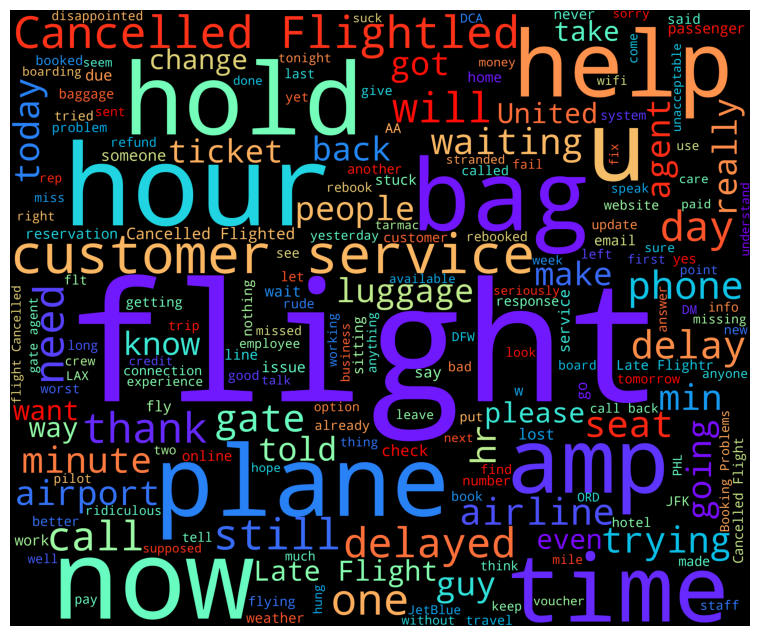

In [113]:
plt.subplots(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Task - Similarly, create the `wordcloud` for `positive tweets`

In [114]:
### Count total number of words in the cleaned_text

print("Total Word Count:", len(cleaned_text.split()))

Total Word Count: 170093


In [115]:
from collections import Counter
word_frequency = Counter(cleaned_text.split())

In [116]:
word_frequency_df = pd.DataFrame(word_frequency.items(), columns=['Word', 'Frequency'])
word_frequency_df_sorted = word_frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

In [117]:
type(word_frequency)

collections.Counter

In [118]:
word_frequency_df_sorted

,Word,Frequency
0,to,5966
1,the,3929
2,I,3375
3,a,3087
4,and,2685
...,...,...
20460,rebook??,1
20461,induce,1
20462,involuntarily,1
20463,guidelines,1


- Unique count of words - 20465

### Data pre-processing steps

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

### Remove `html` tags

In [156]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [157]:
data['text'] = data['text'].apply(lambda x:strip_html(x)) # lambda function takes the entry and passes to strip_html function to remove html tags

In [158]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [159]:
data1= pd.DataFrame({
    'text': [
        '<p>This is a <strong>sample</strong> text with <a href="https://example.com">HTML</a> tags.</p>',
        '<p>It includes various tags such as <em>emphasis</em>, <strong>bold</strong>, and <a href="https://anotherexample.com">links</a>.</p>',
        '<div><ul><li>Item 1</li><li>Item 2</li><li>Item 3</li></ul></div>',
        '<p>Thank you for visiting!</p>'
    ]
})

In [160]:
data1

,text
0,<p>This is a <strong>sample</strong> text with...
1,<p>It includes various tags such as <em>emphas...
2,<div><ul><li>Item 1</li><li>Item 2</li><li>Ite...
3,<p>Thank you for visiting!</p>


In [161]:
data1['text'] = data1['text'].apply(lambda x:strip_html(x)) # lambda function takes the entry and passes to strip_html function to remove html tags

In [162]:
data1['text']

0                This is a sample text with HTML tags.
1    It includes various tags such as emphasis, bol...
2                                   Item 1Item 2Item 3
3                              Thank you for visiting!
Name: text, dtype: object

### Replace contractions in string (e.g., replace `I'm --> I am`, `We'll --> We will`) and so on

In [163]:
def replace_contractions(text):
    '''
    Replace contractions in string of text
    don't --> do not
    '''
    return contractions.fix(text)

In [164]:
data['text'] = data['text'].apply(lambda x:replace_contractions(x)) # lambda function takes the entry and passes to fix contractions in the tweets

In [165]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 people so we need 2 kno...
Name: text, Length: 14640, dtype: object

### Remove numbers

In [166]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

- `re.sub(pattern, replacement, string)`: This function replaces `occurrences of a pattern` in the given string with a `replacement string`.

- `''`: empty string

In [167]:
data['text'] = data['text'].apply(lambda x:remove_numbers(x)) # lambda function takes the entry and removes numbers from the tweets

In [168]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  people so we need  know ...
Name: text, Length: 14640, dtype: object

In [169]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

In [170]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords_set:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words


#### Example for non-ascii characters

In [171]:
remove_non_ascii(['café', 'naïve', 'résumé', 'hello'])


['cafe', 'naive', 'resume', 'hello']

In [172]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ''.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)


In [173]:
data.sample(10).T

,4676,5508,10446,5863,10978,808,1117,13806,7211,9761
tweet_id,569943306613886976,568937199145783297,569295822006960128,568538790244909056,568644053522391041,570072252026376192,569922214255919105,569714383971966976,569885859954229248,569678632567881728
airline_sentiment,positive,neutral,positive,positive,negative,neutral,negative,negative,negative,negative
airline_sentiment_confidence,1.0,1.0,0.6529,1.0,1.0,1.0,1.0,1.0,0.6565,1.0
negativereason,NaN,NaN,NaN,NaN,Cancelled Flight,NaN,Customer Service Issue,Customer Service Issue,Customer Service Issue,Can't Tell
negativereason_confidence,NaN,NaN,0.0,NaN,0.6276,NaN,0.6613,1.0,0.6565,0.3515
airline,Southwest,Southwest,US Airways,Southwest,US Airways,United,United,American,Delta,US Airways
airline_sentiment_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,m_rafano,stacymichael14,jshieber,JackieFromSpace,lj_verde,The5y5Adm1n,raulcordenillo,BobTheBruin,MuttMedia,Mark_Shires
negativereason_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0,0,0,0,0,0,1,0,0,0


### Build the model based on `countvectorizer` and `Random Forest`

In [174]:
# pip install scikit-learn

In [175]:
### Vectorization : Convert text data into numbers
from sklearn.feature_extraction.text import CountVectorizer #to convert a collection of text docs into a matrix of token counts

### Simple example to demonstrate the `text to number conversion`

In [176]:
# Example text data
texts = [
    "I love machine learning",
    "Machine learning is fun",
    "I enjoy learning"
]

In [177]:
print(texts)

['I love machine learning', 'Machine learning is fun', 'I enjoy learning']


In [178]:
### Initialize the countvectorizer
count_vec_ex = CountVectorizer(max_features=100) # max_features --> 100 columns --> 100 words
### Fit and transfrom the text data
data_features = count_vec_ex.fit_transform(texts)
print(data_features)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9 stored elements and shape (3, 6)>
  Coords	Values
  (0, 4)	1
  (0, 5)	1
  (0, 3)	1
  (1, 5)	1
  (1, 3)	1
  (1, 2)	1
  (1, 1)	1
  (2, 3)	1
  (2, 0)	1


In [179]:
### Convert to Array
data_features_to_array_ex = data_features.toarray()

In [180]:
data_features_to_array_ex

array([[0, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 0]])

In [181]:
### Output the results
print('Vocabulary:', count_vec_ex.get_feature_names_out())
print('Data Features Array:\n', data_features_to_array_ex)

Vocabulary: ['enjoy' 'fun' 'is' 'learning' 'love' 'machine']
Data Features Array:
 [[0 0 0 1 1 1]
 [0 1 1 1 0 1]
 [1 0 0 1 0 0]]


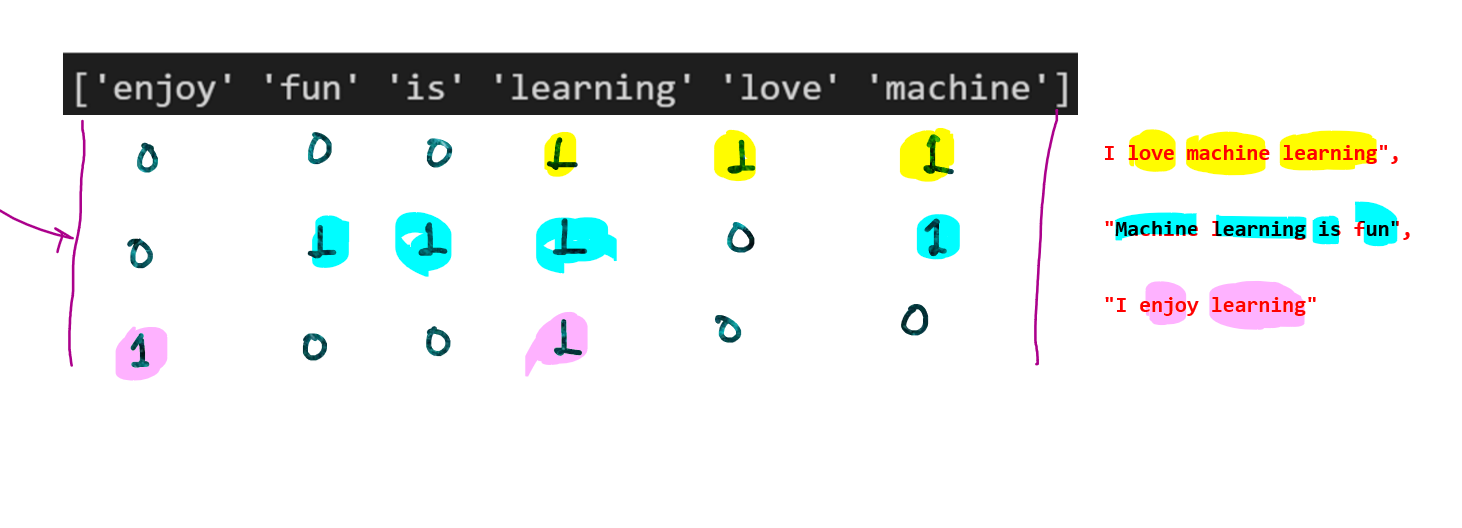

### Let's do for the tweets

In [196]:
Count_vec = CountVectorizer(max_features=50000) #keeping only 5000 features as more number of features will increase the processing time 
data_features_2 = Count_vec.fit_transform(data['text'])

data_features_2_array = data_features_2.toarray()

`max_features`: signifies the unique number of features (i.e., unique words or tokens) --> 5000
    
- Keekping the limit to 5000, it ensures that only top 5000 most frequent words are kept in the model


In [197]:
X = data_features_2 # training features
y = data.airline_sentiment #training target

In [198]:
### Spilt data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Using `Random Forest` to build the model for the classification of tweets

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

nlp_rf = RandomForestClassifier(n_estimators=100, n_jobs=6)

'''
n_estimators=10 --> specifies the number of trees in the forest
n_jobs=4 --> means that up to 4 CPU cores will be used to parallelize the computation, which speeds up the training process
'''

### Training the model
nlp_rf = nlp_rf.fit(X_train, y_train)

In [200]:
print(nlp_rf)

RandomForestClassifier(n_jobs=6)


In [201]:
print(np.mean(cross_val_score(nlp_rf, X,y, cv=5)))

0.6979508196721312


In [202]:
### Generate accuracy on the test set
print(nlp_rf.score(X_test, y_test))

0.7632058287795993


### Agenda for tmrw: Build the same model using word2vec --> Introduce RNN & LSTM --> Hands-on --> Pendig CNN, ANN, Transformers

In [ ]:
### Build the same model using word2vec